In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
column_features = ['Len(m)', 'Wb(m)', 'Door', 'W(100kg)', 'Seats','E_S(1000cc)','S_F','Price']

df = pd.read_csv('cars_data.csv', names=column_features)

In [3]:
df.head()

,Len(m),Wb(m),Door,W(100kg),Seats,E_S(1000cc),S_F,Price
0,4.643,1.973,2,10.60,2,3.9,1,Expensive
1,4.672,1.932,2,10.76,2,4.0,1,Expensive
2,4.331,1.958,2,9.00,2,4.1,1,Expensive
3,4.656,1.835,2,8.49,2,3.9,1,Expensive
4,4.621,1.942,2,10.48,2,3.9,1,Expensive


In [4]:
df.describe()

,Len(m),Wb(m),Door,W(100kg),Seats,E_S(1000cc),S_F
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,4.141804,1.660352,3.904110,13.328219,5.095890,2.602283,0.287671
std,0.341551,0.123161,0.890795,2.581959,2.193596,0.834269,0.453714
min,3.510000,1.409000,2.000000,8.020000,2.000000,1.200000,0.000000
25%,3.847000,1.574500,4.000000,11.740000,4.000000,1.900000,0.000000
50%,4.167000,1.679000,4.000000,13.030000,4.000000,2.500000,0.000000
75%,4.452000,1.749500,4.000000,15.115000,8.000000,3.200000,1.000000
max,4.672000,1.973000,5.000000,18.940000,8.000000,4.100000,1.000000


In [5]:
count_of_cars = len(df[df["Price"]=="Expensive"])
print("Count of Expensive cars: ", count_of_cars)

Count of Expensive cars:  34


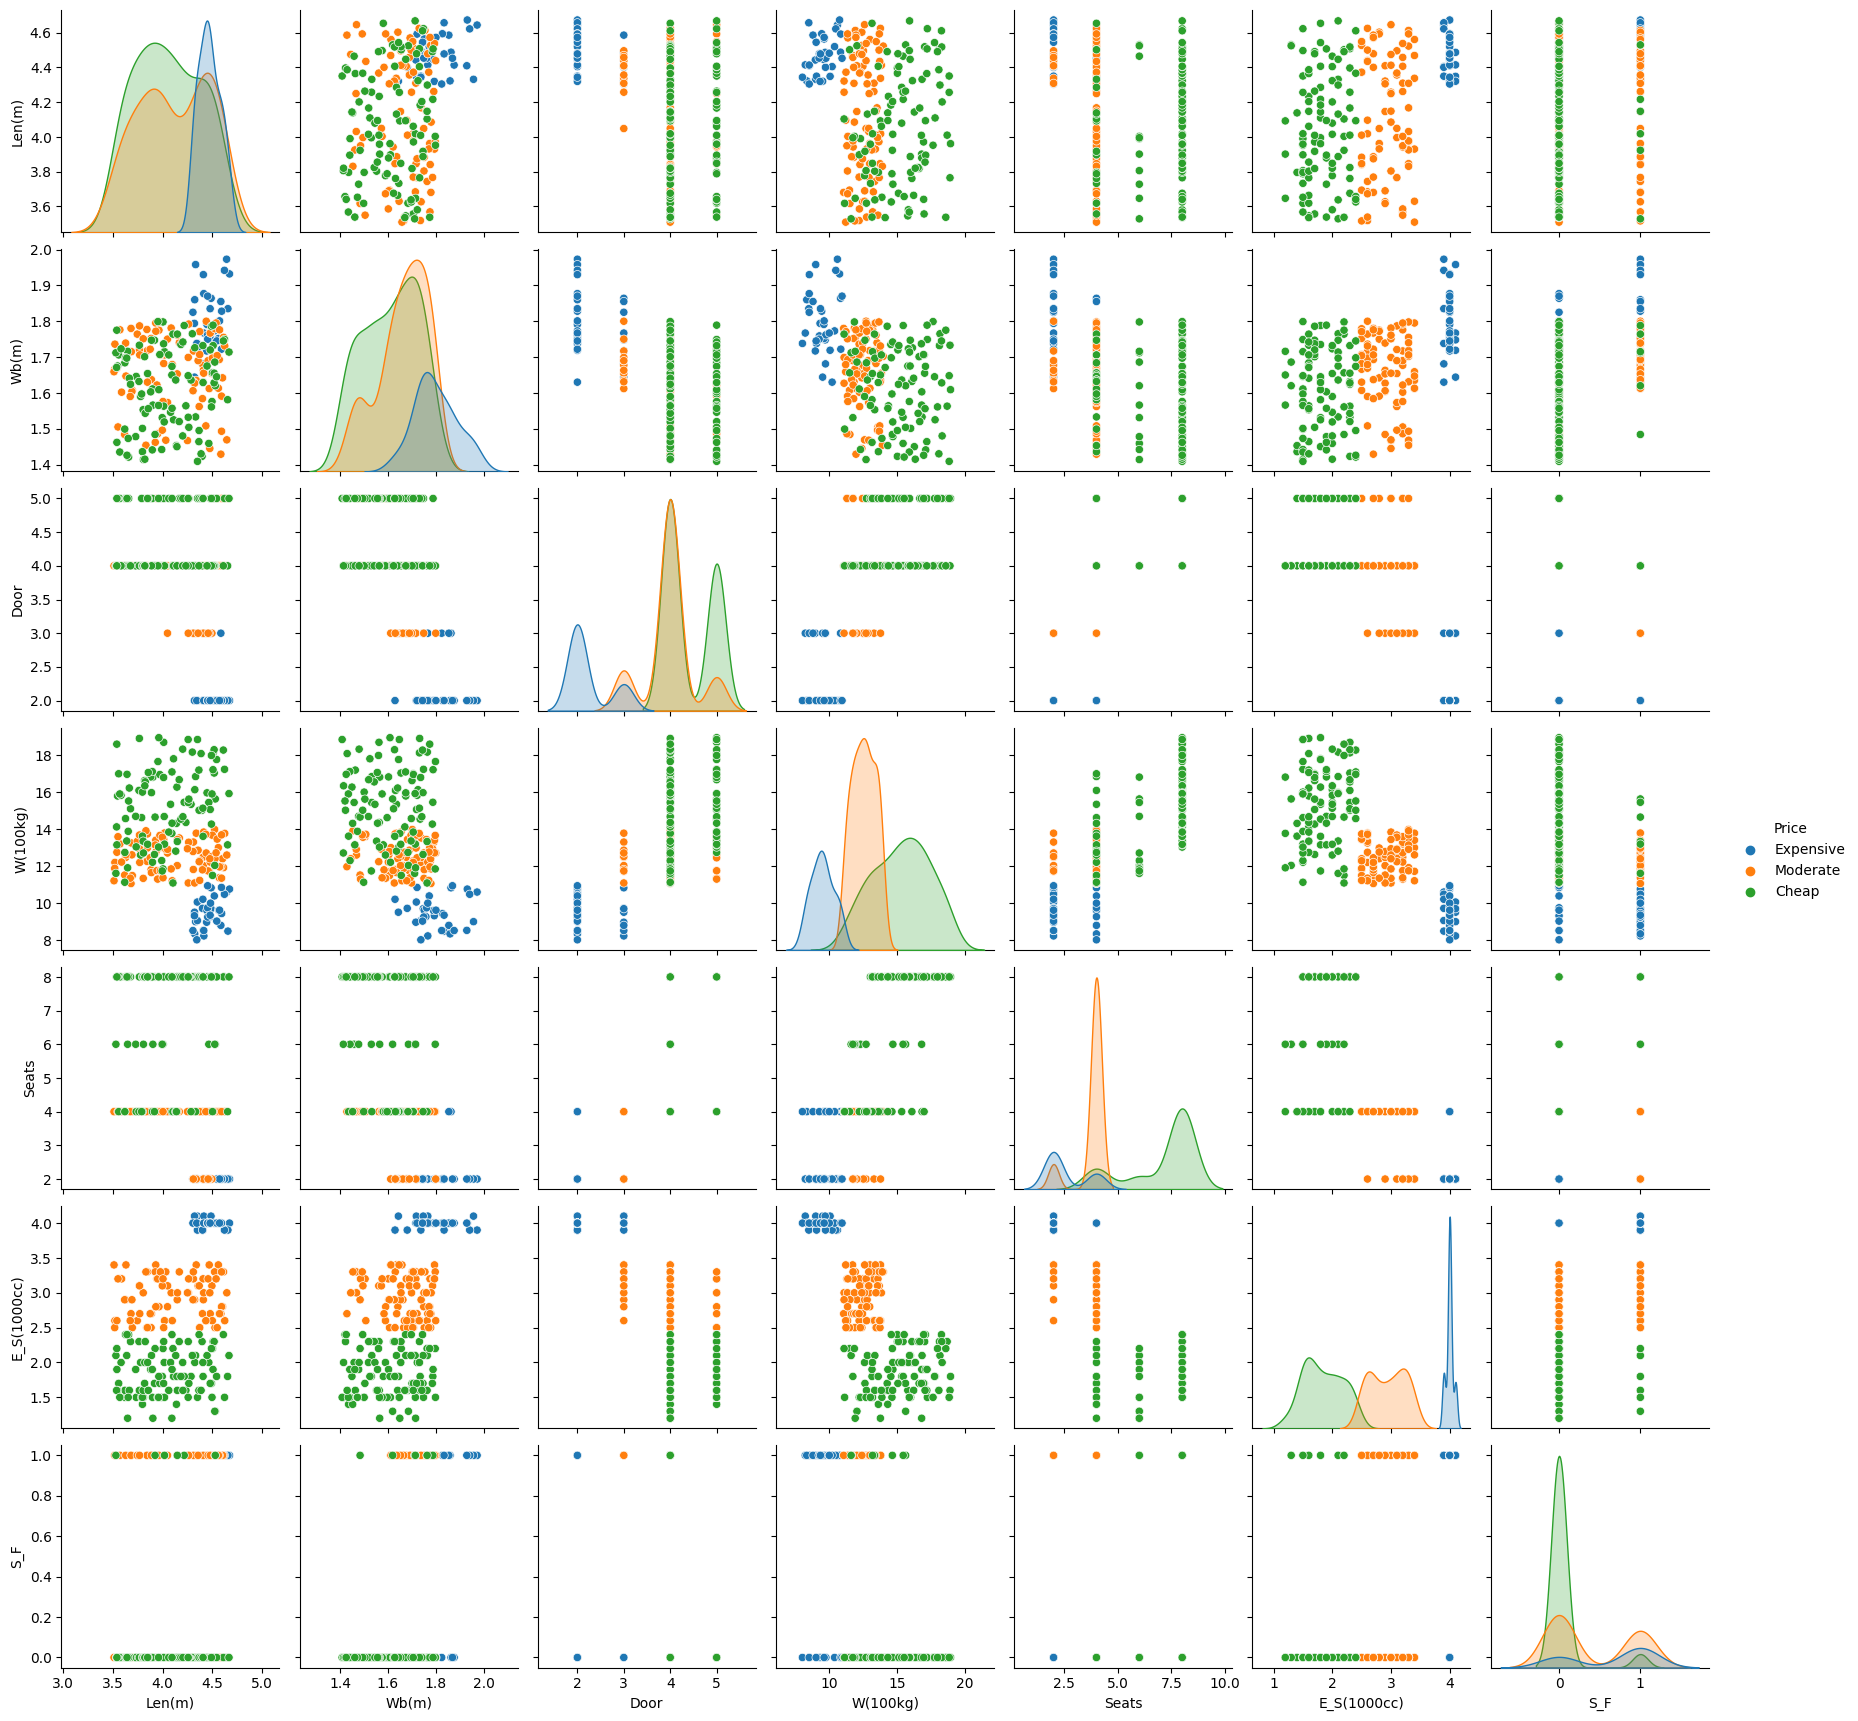

In [6]:
sns.pairplot(df, hue="Price")

In [7]:
# change the categorical data to numerical data

df["Price"] = df["Price"].map({"Cheap":0, "Moderate": 1, "Expensive": 2})

<Axes: >

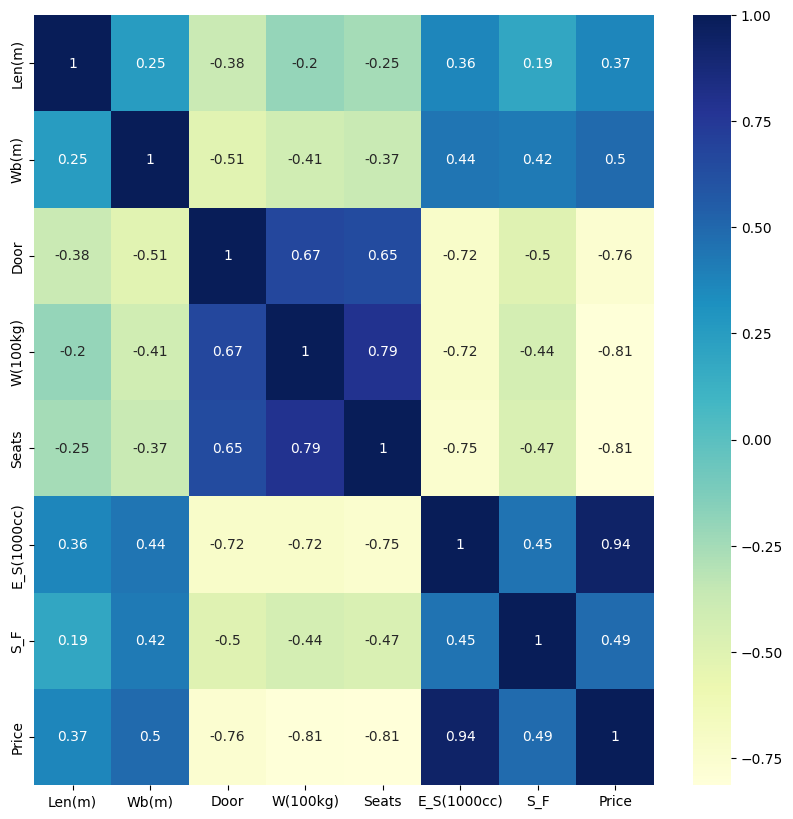

In [8]:
# include price in the correlation image

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [9]:
data = df.values
X = data[:, :-1]
Y = data[:, -1]

In [10]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(7,3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(column_features)-1)
width = 0.25

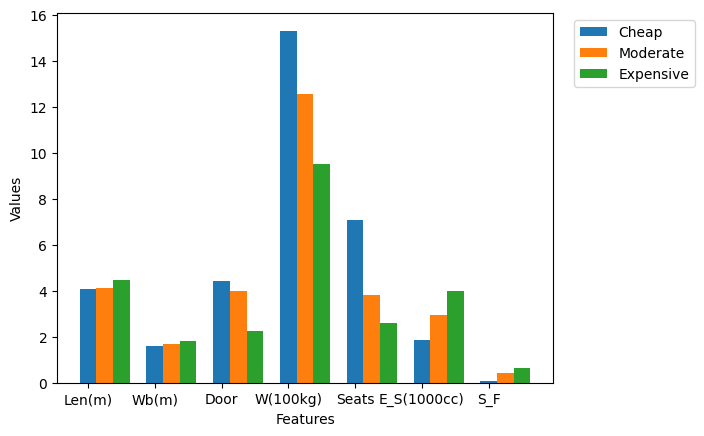

In [11]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Cheap')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Moderate')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Expensive')
plt.xticks(X_axis, column_features[:7])
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [15]:
knn_predictions = knn.predict(X_test)

svm_predictions = svn.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, knn_predictions))
print(accuracy_score(y_test, svm_predictions))

0.9848484848484849
0.9090909090909091


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        28
         1.0       0.96      1.00      0.98        25
         2.0       1.00      1.00      1.00        13

    accuracy                           0.98        66
   macro avg       0.99      0.99      0.99        66
weighted avg       0.99      0.98      0.98        66

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        28
         1.0       0.81      1.00      0.89        25
         2.0       1.00      1.00      1.00        13

    accuracy                           0.91        66
   macro avg       0.94      0.93      0.92        66
weighted avg       0.93      0.91      0.91        66



In [17]:
X_new = np.array([[4.331,1.958,2,9,2,4.1,1],[3.617,1.484,4,11.52,4,2.9,0],[3.546,1.675,4,15.79,8,1.6,0]])

prediction = knn.predict(X_new)
print("Prediction of price: {}".format(prediction))

prediction = svn.predict(X_new)
print("Prediction of price: {}".format(prediction))

Prediction of price: [2. 1. 0.]
Prediction of price: [2. 1. 0.]
